# Gromacs - HECBioSim Benchmarks

Results from the [Gromacs](http://www.gromacs.org/) molecular dynamics code on 3x [HECBioSim](http://www.hecbiosim.ac.uk/benchmarks) benchmarks:
- 61K atom system - 1WDN Glutamine-Binding Protein
- 1.4M atom system - A Pair of hEGFR Dimers of 1IVO and 1NQL
- 3M atom system - A Pair of hEGFR tetramers of 1IVO and 1NQL

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

Each benchmark is run on a range of number of nodes, from 1 up to all available. Each run uses as many mpi tasks (processes) per node as there are physical cores, and the default Gromacs `-ntomp` OpenMP setting, which appears to add threads to use all cores (physical or logical). For further information on Gromacs parallelisation schemes see [here](http://www.gromacs.org/Documentation/Acceleration_and_parallelization) and [here](http://manual.gromacs.org/documentation/current/onlinehelp/gmx-mdrun.html#gmx-mdrun).

The plots show results for the most-recent run on each system/partition/environment combination, against the number of nodes used for each run. Parameters are:
- `runtime_real`: Wallclock time in seconds. Lower values are better performance. 
- `ns_per_day`: Nanoseconds of simulation completed per day. Higher values are better performance.

Gromacs_61k_*: runtime_real


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,338.355,332.361
2,259.840,260.430
4,227.260,229.898
8,319.622,330.762
16,515.379,514.280


Gromacs_61k_*: ns_per_day


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,26.295,26.783
2,34.244,34.158
4,39.360,38.909
8,27.717,26.780
16,17.048,17.070


Gromacs_1400k_*: runtime_real


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,1153.022,1146.071
2,649.122,658.542
4,423.679,420.008
8,300.081,313.495
16,237.303,253.143


Gromacs_1400k_*: ns_per_day


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,1.512,1.521
2,2.707,2.668
4,4.195,4.238
8,5.975,5.721
16,7.640,7.138


Gromacs_3000k_*: runtime_real


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,2694.058,2624.184
2,1395.797,1360.470
4,768.884,789.737
8,493.758,526.318
16,342.631,352.152


Gromacs_3000k_*: ns_per_day


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,0.644,0.662
2,1.248,1.281
4,2.281,2.220
8,3.581,3.357
16,5.223,5.072


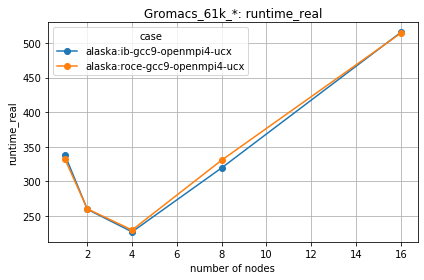

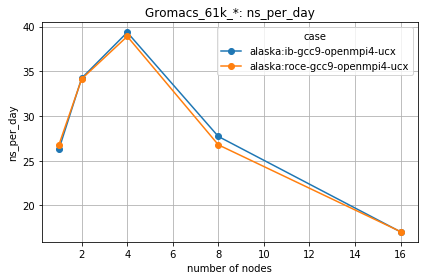

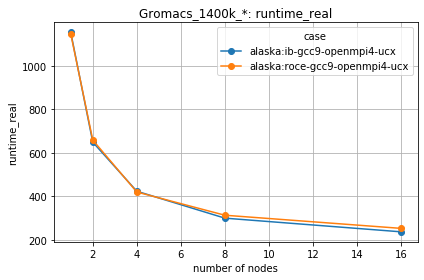

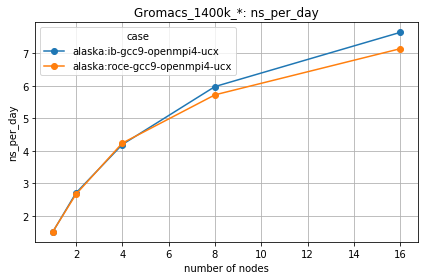

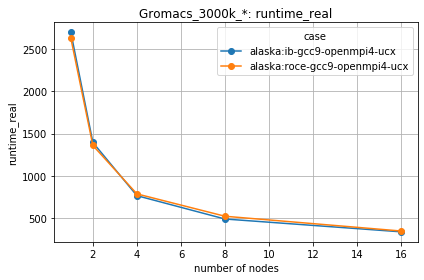

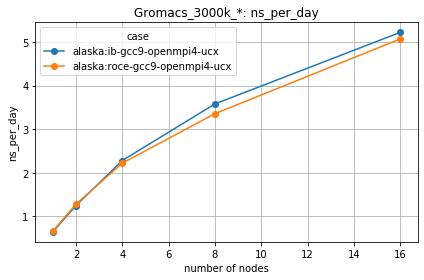

In [2]:
for test in ['Gromacs_61k_*', 'Gromacs_1400k_*', 'Gromacs_3000k_*']:
    for perf_var in ['runtime_real', 'ns_per_day']:
        df = modules.utils.tabulate_last_perf(test, 'num_nodes', perf_var)
        print('%s: %s' % (test, perf_var))
        display(df)
        ax = df.plot(grid=True, style='o-')
        ax.set_xlabel('number of nodes')
        ax.set_ylabel(perf_var)
        ax.set_title('%s: %s' % (test, perf_var))
        plt.tight_layout()